## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from top2vec import Top2Vec
import sys

2022-07-25 22:29:38.629321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-25 22:29:38.629345: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 0.2 Path Adjustments

In [2]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('..')
    sys.path.append('./src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements".


## 1. Train

In [45]:
configs = {
    'dataset': 'crisis_12',
    'preprocessing_funcs': [
        'to_lowercase',
        'standardize_accented_chars',
        'remove_url',
        'expand_contractions',
        'remove_mentions',
        'remove_hashtags',
        'remove_new_lines',
        'keep_only_alphabet',
        # 'remove_extra_spaces',
        'remove_english_stop_words',
        'lemmatize_noun'
    ],
    'algorithm_args': {
        'algorithm': 'top2vec',
        'num_topics': 4,
         # 'embedding_model': 'doc2vec',
         #'embedding_model': 'universal-sentence-encoder',
       'embedding_model': 'universal-sentence-encoder-large', # WORKS VERY WELL
        # 'embedding_model': 'distiluse-base-multilingual-cased',
        'doc2vec_speed': 'learn',
        'min_count': 50,
        'umap_args': {
            'n_neighbors': 15,
            'n_components': 5,
            'metric': 'cosine',
            'random_state': 42  # Try to always include this for reproducibility, github.com/ddangelov/Top2Vec/issues/86
        },
        'hdbscan_args': {
            'min_cluster_size': 15,
            'metric': 'euclidean',
            'cluster_selection_method': 'eom'
        }
    }
}


In [46]:
from src import preprocessor,top2vec_runner
from src.utils import load_documents

docs,labels = load_documents(dataset=configs['dataset'])
if 'preprocessing_funcs' in configs:
    docs = preprocessor.run(data=docs, prep_functions=configs['preprocessing_funcs'])
    
algorithm_args = configs['algorithm_args']
algorithm_args.update(data_name=configs['dataset'],docs=docs,labels=labels)

from time import time
algorithm_name = algorithm_args['algorithm'].lower()
if algorithm_name == 'top2vec':
    from src import top2vec_runner
    algorithm_args.update(run_id=int(time()))
    model, df_output_doc_topic, df_output_topic_word = top2vec_runner.parametric_run(args=algorithm_args)

[INFO] [PREPROCESSOR] Available Preprocessing Functions in the Module:['to_lowercase', 'standardize_accented_chars', 'remove_url', 'expand_missing_delimiter', 'remove_mentions', 'remove_hashtags', 'keep_only_alphabet', 'remove_new_lines', 'remove_extra_spaces', 'remove_html_tags', 'expand_contractions', 'remove_english_stop_words', 'lemmatize', 'lemmatize_verb', 'lemmatize_noun', 'lemmatize_adjective', 'correct_typo']
[INFO] [PREPROCESSOR] Preprocessing starting..
[INFO] [PREPROCESSOR] These string preprocessing methods will be applied to the data in order:
(  'to_lowercase',
   'standardize_accented_chars',
   'remove_url',
   'remove_mentions',
   'remove_hashtags',
   'remove_new_lines',
   'keep_only_alphabet')
[INFO] [PREPROCESSOR] Then, these tokenized preprocessing methods will be applied in order:
(  '__tokenize',
   'expand_contractions',
   'remove_english_stop_words',
   'lemmatize_noun',
   '__glue')


2022-07-26 00:16:49,548 - top2vec - INFO - Pre-processing documents for training
2022-07-26 00:16:49,548 INFO:Pre-processing documents for training
2022-07-26 00:16:49,726 - top2vec - INFO - Loading universal-sentence-encoder-large model at ./pretrained_models/universal-sentence-encoder-large
2022-07-26 00:16:49,726 INFO:Loading universal-sentence-encoder-large model at ./pretrained_models/universal-sentence-encoder-large


[INFO] [PREPROCESSOR] Preprocessing completed in 0.526 seconds..
[INFO] Top2Vec Parameters:
{
    "algorithm": "top2vec",
    "num_topics": 4,
    "embedding_model": "universal-sentence-encoder-large",
    "doc2vec_speed": "learn",
    "min_count": 50,
    "umap_args": {
        "n_neighbors": 15,
        "n_components": 5,
        "metric": "cosine",
        "random_state": 42
    },
    "hdbscan_args": {
        "min_cluster_size": 15,
        "metric": "euclidean",
        "cluster_selection_method": "eom"
    },
    "data_name": "crisis_12",
    "run_id": 1658787409
}
[INFO] The embedding model folder:"./pretrained_models/sentence-transformers_distiluse-base-multilingual-cased" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/sentence-transformers_all-MiniLM-L6-v2" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/sentence-transformers_paraphrase-multilingual-MiniLM-L12-v2" found, so no need to download.
[INFO

2022-07-26 00:16:51.186088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-26 00:16:51.186115: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-26 00:16:51.186135: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iceking-ThinkPad-T490): /proc/driver/nvidia/version does not exist
2022-07-26 00:16:51.186361: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-26 00:16:59,951 - top2vec - INFO - Creating joint document/word embedding
2022-07-26 00:16:59

[INFO] Original (Non-reduced) Number of Topics: 48.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:2429.
     > Topic Words: ['flood' 'flooding' 'flooded' 'rain' 'storm' 'disaster' 'evacuation'
		 'earthquake' 'cyclone' 'aftermath' 'wildfire' 'river' 'emergency' 'water'
		 'devastating' 'warning' 'flash' 'update' 'mcmurray' 'omg' 'massive'
		 'caused' 'queensland' 'fuck' 'damage' 'weather' 'cancelled' 'damn'
		 'affected' 'tropical' 'shark' 'wake' 'convoy' 'victim' 'fort' 'flee'
		 'hit' 'hope' 'shit' 'brisbane' 'qld' 'pm' 'crazy' 'big' 'coast' 'oakland'
		 'county' 'due' 'news' 'lost']
     > Topic Word Scores: [0.569806   0.5614662  0.5142871  0.31152508 0.30128533 0.27429798
		 0.27426216 0.26630098 0.24780872 0.22577465 0.19579382 0.1925987
		 0.18748175 0.15446603 0.13131517 0.1250065  0.12488301 0.12260035
		 0.12083839 0.11947061 0.11792807 0.11452129 0.10478583 0.10251376
		 0.10127717 0.10032493 0.09953207 0.09894555 0.09409025 0.09066474
		 0.09038419 0.0

## 2. Print Outputs

In [47]:
df_output_doc_topic

,run_id,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
3367,1658787409,0,thereformedcrow nah going to go earthquake,earthquake,1,0.766097
3198,1658787409,1,think earthquake,earthquake,1,0.805313
3033,1658787409,2,uhh else felt earthquake though,earthquake,1,0.833730
3530,1658787409,3,bay area nice size earthquake,earthquake,1,0.720836
3967,1658787409,4,thought dad farting turn earthquake,earthquake,1,0.576454
...,...,...,...,...,...,...
7586,1658787409,7995,due severity weather ex tropical cyclone debbi...,hurricane,3,0.613004
1859,1658787409,7996,wot wet weather plan today,hurricane,0,0.398956
7072,1658787409,7997,folk rain south east queensland coming ex cycl...,hurricane,3,0.725847
7420,1658787409,7998,ahh man realised put bin weather low blow ex t...,hurricane,3,0.657208


In [48]:
with pd.option_context('display.max_colwidth', 100):
    display(df_output_topic_word)

,run_id,method,method_specific_params,dataset,num_given_topics,reduced,topic_num,topic_size,topic_words,word_scores,num_detected_topics,num_final_topics,duration_secs
0,1658787409,top2vec,"{'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder-large...",crisis_12,4,True,0,2429,"[flood, flooding, flooded, rain, storm, disaster, evacuation, earthquake, cyclone, aftermath, wi...","[0.569806, 0.5614662, 0.5142871, 0.31152508, 0.30128533, 0.27429798, 0.27426216, 0.26630098, 0.2...",48,4,60.007
1,1658787409,top2vec,"{'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder-large...",crisis_12,4,True,1,2253,"[earthquake, cyclone, disaster, flooding, flooded, flood, aftermath, storm, magnitude, devastati...","[0.8782074, 0.4513772, 0.41905966, 0.3936975, 0.39047247, 0.37273496, 0.37225205, 0.36113033, 0....",48,4,60.007
2,1658787409,top2vec,"{'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder-large...",crisis_12,4,True,2,1735,"[wildfire, fire, mcmurray, burning, burn, earthquake, evacuation, california, aftermath, disaste...","[0.60298735, 0.32597384, 0.31699085, 0.31299108, 0.2702694, 0.25989366, 0.24786401, 0.22767417, ...",48,4,60.007
3,1658787409,top2vec,"{'doc2vec_speed': 'learn', 'min_count': 50, 'embedding_model': 'universal-sentence-encoder-large...",crisis_12,4,True,3,1583,"[cyclone, debbie, storm, flooding, queensland, earthquake, qld, brisbane, disaster, flood, flood...","[0.49713293, 0.399881, 0.37488106, 0.2961545, 0.28878933, 0.2875486, 0.26392728, 0.25000703, 0.2...",48,4,60.007


In [49]:
# First Documents
for i in sorted(df_output_topic_word['topic_num'].to_list()):
    x = df_output_doc_topic.query(f'`Assigned Topic Num` == {i}').sort_values(by ='Assignment Score',ascending=False).drop('run_id',axis=1).head()
    with pd.option_context('display.max_colwidth', None):
        display(x)

,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
0,3580,flood watch next hour raining sooooooo,flood,0,0.788851
1,3786,flash flood warning going nowhere today got want,flood,0,0.788337
2,3894,flash flood warning serious dangerous af get excited hear one love rain,flood,0,0.778363
3,3616,flash flood watch issued ocean county flash flood warning lol,flood,0,0.778361
4,3708,flash flood warning till awesome,flood,0,0.771594


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
2429,1278,earthquake whoa,earthquake,1,0.955131
2430,230,uhhhhh earthquake,earthquake,1,0.952564
2431,1183,whoa earthquake,earthquake,1,0.949208
2433,1440,whoa earthquake,earthquake,1,0.949208
2432,380,whoa earthquake,earthquake,1,0.949208


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
4683,5144,picture deadly wildfire hit northern california,forestfire,2,0.876853
4682,5920,picture deadly wildfire hit northern california,forestfire,2,0.876853
4684,5760,wildfire burn control across northern california dead,forestfire,2,0.861569
4685,5833,unprecedented wildfire break northern southern california,forestfire,2,0.856838
4687,4977,shocking image devastating wildfire northern california,forestfire,2,0.855483


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
6417,7482,cyclone debbie wreaks havoc storm tear australia,hurricane,3,0.912680
6418,7737,cyclone debbie queensland braced dangerous flood,hurricane,3,0.905745
6419,7488,cyclone debbie hit queensland coast news,hurricane,3,0.895004
6420,6191,cyclone debbie severe shut literally whole state queensland,hurricane,3,0.890853
6421,7011,cyclone debbie make landfall mph wind trigger mass evacuation queensland,hurricane,3,0.889239


## 3. Visualization

### Draw Topic Similarity Matrix

In [23]:
from src import visualizer

visualizer.visualize_topic_similarity_matrix(
    model=model,
    df_output_doc_topic=df_output_doc_topic,
    df_output_topic_word=df_output_topic_word,
    topics= None,
    top_n_topics = None,
    n_clusters = None, # Unknown for now
    width = 1000,
    height = 1000
)

[INFO] Creating Topic Similarity Matrix..
[INFO] Created Topic Similarity Matrix successfully.


### Draw Labels per Topic

In [50]:
from src import visualizer
a = visualizer.visualize_labels_per_topic(df_output_doc_topic=df_output_doc_topic,
                               df_output_topic_word=df_output_topic_word) #,top_n_labels=5,top_n_topics=4)

[INFO] Creating Labels Per Topic Visualization..
[INFO] Created Labels Per Topic Visualization successfully.


In [51]:
a

### Draw 2D Document Vectors 

[INFO] Creating UMAP 2D Scatter Plot..
[INFO] UMAP Arguments for Visualization:{'n_neighbors': 15, 'n_components': 2, 'metric': 'cosine', 'random_state': 42}
[INFO] UMAP Model is being fitted..
[INFO] UMAP Model successfully fitted.
[INFO] Created UMAP 2D Scatter Plot successfully.


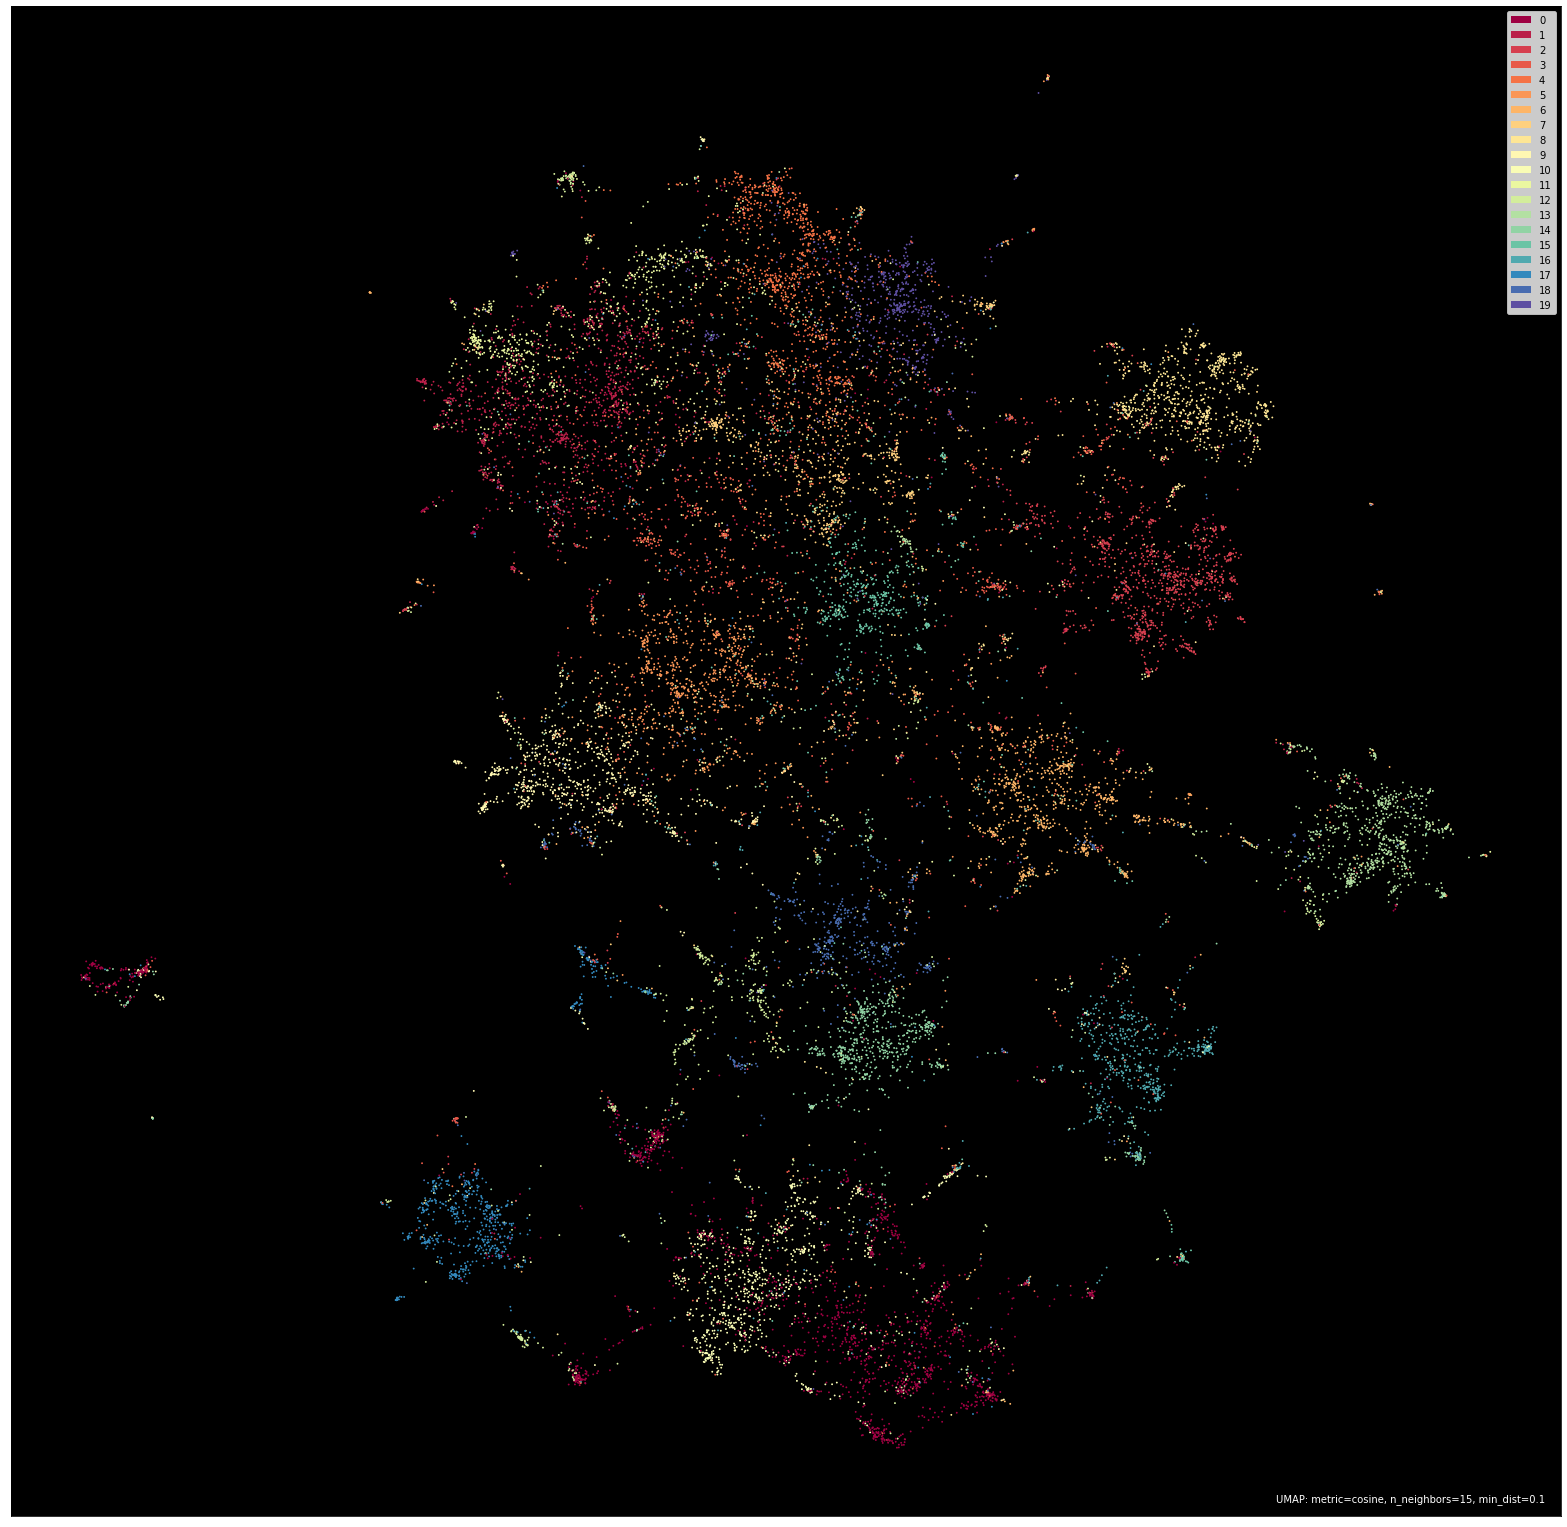

In [32]:
from src import visualizer

x = visualizer.draw_umap2d_scatter_plot(model, df_output_topic_word,df_output_doc_topic,target_dir='.')

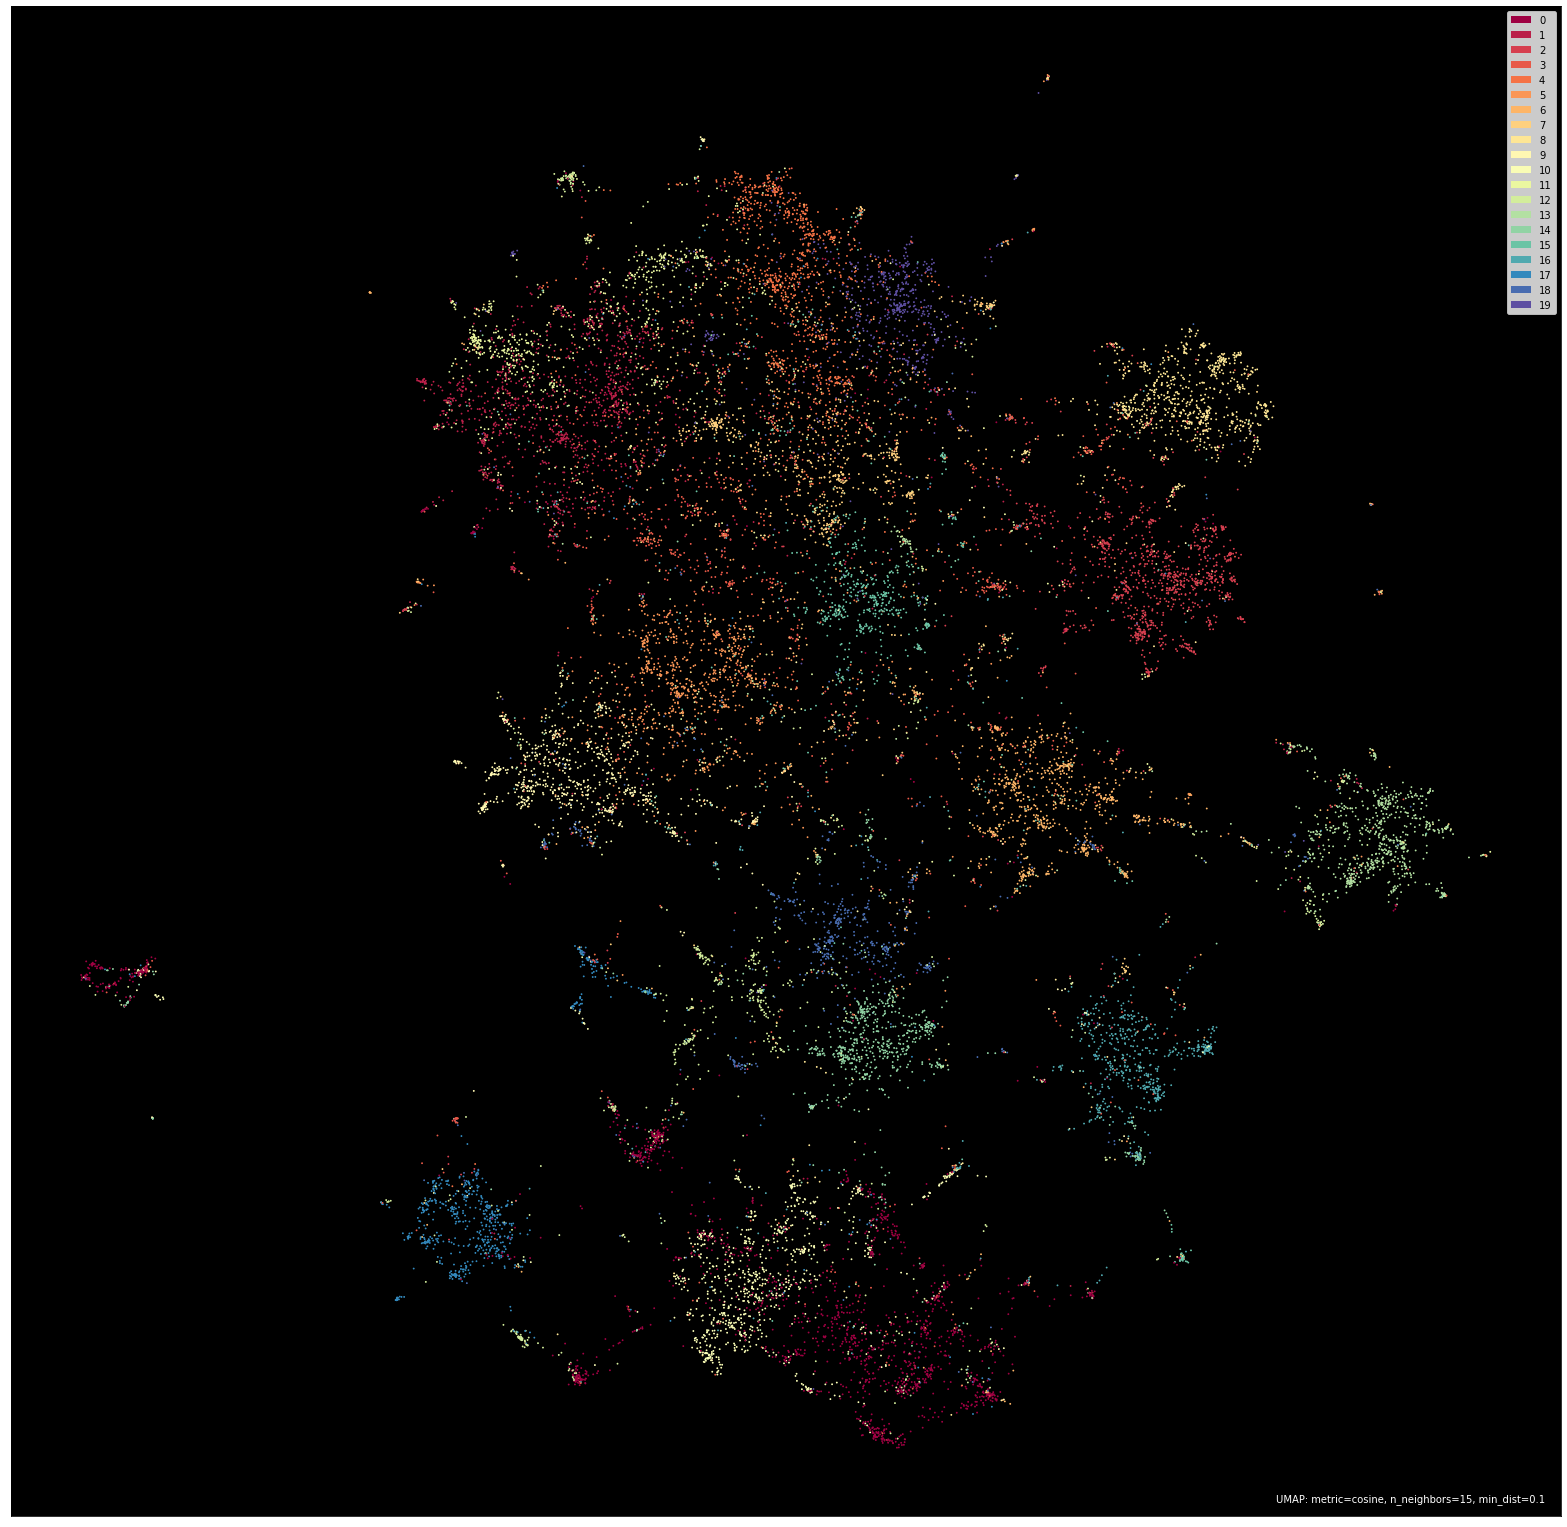

In [33]:
x

### Draw Topic Words Barchart

In [39]:
from src import visualizer

x = visualizer.visualize_top_words_barchart(df_output_topic_word=df_output_topic_word,n_words=5,target_dir='./',top_n_topics=10)

[INFO] Creating Top Words Barchart Visualization..


[0726/000011.528050:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0726/000011.535703:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.


[INFO] Created Top Words Barchart Visualization successfully.


[0726/000012.140186:INFO:headless_shell.cc(660)] Written to file /home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements/vis_top_words_barchart.png.


In [40]:
x

In [ ]:
x.write_image('asd.jpg',engine='orca')

In [ ]:
import plotly

In [ ]:
import imgkit

imgkit.from_file('./ad.html', 'out.jpg')

In [ ]:
x.write_image('./ad.png')

### Draw Representative Docs

In [ ]:
from src.visualizer import draw_representative_docs
batch

import dataframe_image as dfi 
dfi.export(x,'./output/visualization/repr_docs_vis.png')
x

## Evaluation Part (Draft)

### Topic-Label Distribution

In [ ]:
for i in range(len(df_output_topic_word)):
    print(f'Topic {i}:')
    print(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts())
    print('-'*32)

In [ ]:
a = []
for i in range(len(df_output_topic_word)):
    a.append(f'Topic {i}:')
    a.append(str(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts()))
    a.append('-'*32)
a = '\n'.join(a)

In [ ]:
def foo():
    for line in a.splitlines():
        if line != '-'*32:
            print(line)
        else:
            yield ''

### Diversity and Coherence

In [ ]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [ ]:
from src.utils import load_documents
documents,_ = load_documents('./data/20news_bydate','text')

In [ ]:
model_output = {"topics":df_output_topic_word['topic_words'].tolist()}
metric_diversity = TopicDiversity()
metric_coherence = Coherence(texts = [d.split(" ") for d in documents], measure = "c_v")
score_diversity = metric_diversity.score(model_output)
score_coherence = metric_coherence.score(model_output)
print(f'> score_diversity={"%.4f" % score_diversity},score_coherence={"%.4f" %score_coherence}')

In [ ]:
# -----------------------

In [ ]:


model_output = {"topics":[topic_stat['topic_words'] for topic_stat in topic_stats]}


for topk_val in range(1,30):
    metric_diversity = TopicDiversity(topk=topk_val)
    metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = topk_val, measure = "c_v")
    score_diversity = metric_diversity.score(model_output)
    score_coherence = metric_coherence.score(model_output)
    print(f'> topk={topk_val},score_diversity={"%.2f" % score_diversity},score_coherence={"%.2f" %score_coherence}')